<a href="https://colab.research.google.com/github/shivani020/deep-learning-image-classification/blob/main/cats_v_dogs_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

cp: cannot stat 'kaggle.json': No such file or directory


In [ ]:
!kaggle datasets download -d salader/dogs-vs-cats

Dataset URL: https://www.kaggle.com/datasets/salader/dogs-vs-cats
License(s): unknown
 99% 1.06G/1.06G [00:04<00:00, 279MB/s]
100% 1.06G/1.06G [00:04<00:00, 233MB/s]


In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("salader/dogs-vs-cats")

print("Path to dataset files:", path)

100%|██████████| 1.06G/1.06G [00:05<00:00, 219MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/salader/dogs-vs-cats/versions/1


In [ ]:
import zipfile
zip_ref = zipfile.ZipFile('/content/dogs-vs-cats.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, BatchNormalization, Dropout

In [ ]:
#generators -> divides data into batches, at one time one batch is loaded into ram
# here we are using generator image data loading
train_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/train',
    labels = 'inferred',
    label_mode = 'int',
    batch_size = 32,
    image_size = (256, 256)
)

validation_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/test',
    labels = 'inferred',
    label_mode = 'int',
    batch_size = 32,
    image_size = (256, 256)
)


Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [ ]:
#normalise
def process(image, label):
  image = tf.cast(image/255. , tf.float32)
  return image,label

train_ds = train_ds.map(process)
validation_ds = validation_ds.map(process)

In [ ]:
#CNN model banana h, we would have 3 convolution layer with different number of filters
model = Sequential()
#convolution layer 1
model.add(Conv2D(32, kernel_size=(3,3), padding='valid', activation='relu', input_shape=(256, 256, 3)))
model.add(BatchNormalization())

#pooling layer 1
model.add(MaxPooling2D(pool_size=(2,2), strides=2, padding='valid'))

#convolution layer 2
model.add(Conv2D(64, kernel_size=(3,3), padding='valid', activation='relu'))
model.add(BatchNormalization())
#pooling layer 2
model.add(MaxPooling2D(pool_size=(2,2), strides=2, padding='valid'))

#convolution layer 3
model.add(Conv2D(128, kernel_size=(3,3), padding='valid', activation='relu'))
model.add(BatchNormalization())
#pooling layer 3
model.add(MaxPooling2D(pool_size=(2,2), strides=2, padding='valid'))
#flatten layer
model.add(Flatten())

# Adding fully connected layers

model.add(Dense(128, activation='relu')) #128 neurons
model.add(Dropout(0.1))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1, activation='sigmoid'))



In [ ]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_5 (Conv2D)                    │ (None, 254, 254, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 254, 254, 32)        │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 127, 127, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 125, 125, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 125, 125, 64)        │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 62, 62, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 60, 60, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 60, 60, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 30, 30, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 115200)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 128)                 │      14,745,728 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 14,848,193 (56.64 MB)

 Trainable params: 14,847,745 (56.64 MB)

 Non-trainable params: 448 (1.75 KB)

In [ ]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
history = model.fit(train_ds, epochs=10, validation_data = validation_ds)

Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 57s 82ms/step - accuracy: 0.5574 - loss: 2.4008 - val_accuracy: 0.6862 - val_loss: 0.6005
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 52s 82ms/step - accuracy: 0.6830 - loss: 0.5993 - val_accuracy: 0.6846 - val_loss: 0.7707
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 47s 75ms/step - accuracy: 0.7508 - loss: 0.5099 - val_accuracy: 0.7768 - val_loss: 0.4716
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 86s 82ms/step - accuracy: 0.7995 - loss: 0.4319 - val_accuracy: 0.7812 - val_loss: 0.4594
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 78s 76ms/step - accuracy: 0.8225 - loss: 0.3922 - val_accuracy: 0.7208 - val_loss: 0.5604
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 86s 82ms/step - accuracy: 0.8539 - loss: 0.3291 - val_accuracy: 0.7288 - val_loss: 0.5508
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 78s 76ms/step - accuracy: 0.8885 - loss: 0.2571 - val_accuracy: 0.7984 - val_loss: 0.4382
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 81s 75ms/step - accuracy: 0.9162 - loss: 0.2020 - 

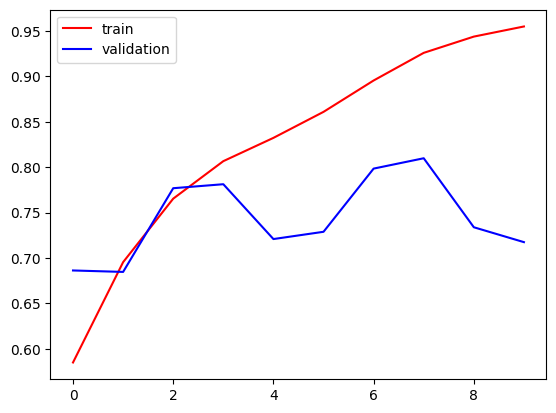

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], color='red', label='train')
plt.plot(history.history['val_accuracy'], color='blue', label='validation')
plt.legend()
plt.show()
#here the gap shows overfitting

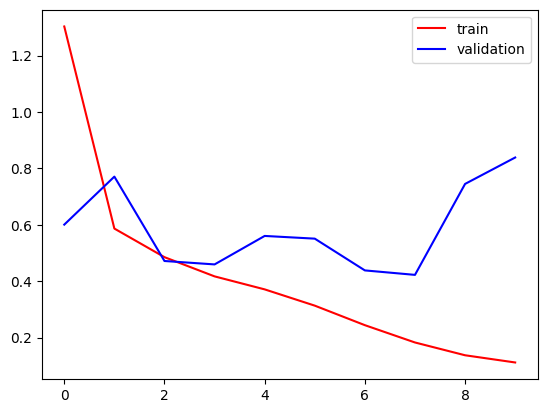

In [ ]:
plt.plot(history.history['loss'], color='red', label='train')
plt.plot(history.history['val_loss'], color='blue', label='validation')
plt.legend()
plt.show()

In [ ]:
#ways to reduce overfitting
#Add more data
#Data Augmentation -> create more data using existing data
#L1/L2 Regularizer
#Dropout
#Batch normalisation
#reduce complexity

In [ ]:
import cv2

In [ ]:
test_img = cv2.imread('/content/cat.jpeg')

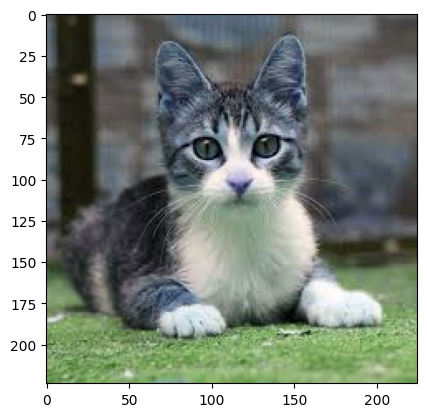

In [ ]:
plt.imshow(test_img)

In [ ]:
test_img.shape

(224, 225, 3)

In [ ]:
test_img = cv2.resize(test_img, (256, 256))

In [ ]:
test_input = test_img.reshape((1, 256, 256,3))

In [ ]:
model.predict(test_input)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


array([[0.00273778]], dtype=float32)